In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
P = pd.read_csv('tianchi_fresh_comp_train_item.csv')
D = pd.read_csv('tianchi_fresh_comp_train_user.csv')
print(D.head())
print(P.head())

    user_id    item_id  behavior_type user_geohash  item_category  \
0  10001082  285259775              1      97lk14c           4076   
1  10001082    4368907              1          NaN           5503   
2  10001082    4368907              1          NaN           5503   
3  10001082   53616768              1          NaN           9762   
4  10001082  151466952              1          NaN           5232   

            time  
0  2014-12-08 18  
1  2014-12-12 12  
2  2014-12-12 12  
3  2014-12-02 15  
4  2014-12-12 11  
     item_id item_geohash  item_category
0  100002303          NaN           3368
1  100003592          NaN           7995
2  100006838          NaN          12630
3  100008089          NaN           7791
4  100012750          NaN           9614


In [3]:
print(D.behavior_type.value_counts())
print(D.behavior_type.value_counts(1))

1    21940520
3      659437
2      458491
4      232579
Name: behavior_type, dtype: int64
1    0.942016
3    0.028313
2    0.019685
4    0.009986
Name: behavior_type, dtype: float64


In [4]:
count_day = {}  
for i in range(31): 
    if i <= 12: 
        date = '2014-11-%d' % (i+18)
    elif i <=21:
        date = '2014-12-0%d' % (i-12)
    else: 
        date = '2014-12-%d' % (i-12)
    count_day[date] = 0

In [5]:
batch = 0
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H')
for df in pd.read_csv("tianchi_fresh_comp_train_user.csv", 
                      parse_dates=['time'], index_col=['time'], date_parser= dateparse, chunksize = 100000):
    for i in range(31):
        if i<=12:
            date = '2014-11-%d' % (i+18)
        elif i <=21:
            date = '2014-12-0%d' % (i-12)
        else:
            date = '2014-12-%d' % (i-12)
        count_day[date]+= df[date].shape[0]
    batch += 1
    print('chunk %d done.' %batch )

chunk 1 done.
chunk 2 done.
chunk 3 done.
chunk 4 done.
chunk 5 done.
chunk 6 done.
chunk 7 done.
chunk 8 done.
chunk 9 done.
chunk 10 done.
chunk 11 done.
chunk 12 done.
chunk 13 done.
chunk 14 done.
chunk 15 done.
chunk 16 done.
chunk 17 done.
chunk 18 done.
chunk 19 done.
chunk 20 done.
chunk 21 done.
chunk 22 done.
chunk 23 done.
chunk 24 done.
chunk 25 done.
chunk 26 done.
chunk 27 done.
chunk 28 done.
chunk 29 done.
chunk 30 done.
chunk 31 done.
chunk 32 done.
chunk 33 done.
chunk 34 done.
chunk 35 done.
chunk 36 done.
chunk 37 done.
chunk 38 done.
chunk 39 done.
chunk 40 done.
chunk 41 done.
chunk 42 done.
chunk 43 done.
chunk 44 done.
chunk 45 done.
chunk 46 done.
chunk 47 done.
chunk 48 done.
chunk 49 done.
chunk 50 done.
chunk 51 done.
chunk 52 done.
chunk 53 done.
chunk 54 done.
chunk 55 done.
chunk 56 done.
chunk 57 done.
chunk 58 done.
chunk 59 done.
chunk 60 done.
chunk 61 done.
chunk 62 done.
chunk 63 done.
chunk 64 done.
chunk 65 done.
chunk 66 done.
chunk 67 done.
chun

In [6]:
import csv 

def row_dict2csv(raw_dict = {}, csv_file = ""):
    with open(csv_file,'w') as f:
        w = csv.writer(f)
        w.writerows(raw_dict.items())
        
row_dict2csv(count_day, "count_by_day.csv" )

         time   count
0  2014-11-21  634122
1  2014-12-11  944979
2  2014-12-10  788712
3  2014-12-04  745391
4  2014-12-16  751370


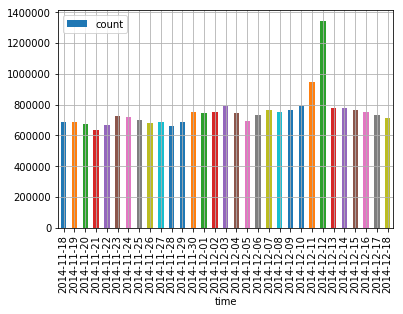

In [7]:
df_count_day = pd.read_csv("count_by_day.csv",header = None, names = ['time', 'count'])
print(df_count_day.head())

df_count_day = df_count_day.sort_values('time').set_index('time')
df_count_day['count'].plot(kind='bar')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [8]:
count_day = {}  
for i in range(31): 
    if i <= 12: 
        date = '2014-11-%d' % (i+18)
    elif i <=21:
        date = '2014-12-0%d' % (i-12)        
    else: 
        date = '2014-12-%d' % (i-12)
    count_day[date] = 0   
batch = 0
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H')

In [9]:
batch = 0
for df in pd.read_csv("tianchi_fresh_comp_train_user.csv", 
                      parse_dates=['time'], index_col=['time'], date_parser= dateparse, chunksize = 100000):
    df = pd.merge(df.reset_index(), P, on = ['item_id']).set_index('time')
    for i in range(31):
        if i<=12:
            date = '2014-11-%d' % (i+18)
        elif i <=21:
            date = '2014-12-0%d' % (i-12) 
        else:
            date = '2014-12-%d' % (i-12)
        count_day[date] += df[date].shape[0]
    batch += 1
    print('chunk %d done.' %batch ) 

chunk 1 done.
chunk 2 done.
chunk 3 done.
chunk 4 done.
chunk 5 done.
chunk 6 done.
chunk 7 done.
chunk 8 done.
chunk 9 done.
chunk 10 done.
chunk 11 done.
chunk 12 done.
chunk 13 done.
chunk 14 done.
chunk 15 done.
chunk 16 done.
chunk 17 done.
chunk 18 done.
chunk 19 done.
chunk 20 done.
chunk 21 done.
chunk 22 done.
chunk 23 done.
chunk 24 done.
chunk 25 done.
chunk 26 done.
chunk 27 done.
chunk 28 done.
chunk 29 done.
chunk 30 done.
chunk 31 done.
chunk 32 done.
chunk 33 done.
chunk 34 done.
chunk 35 done.
chunk 36 done.
chunk 37 done.
chunk 38 done.
chunk 39 done.
chunk 40 done.
chunk 41 done.
chunk 42 done.
chunk 43 done.
chunk 44 done.
chunk 45 done.
chunk 46 done.
chunk 47 done.
chunk 48 done.
chunk 49 done.
chunk 50 done.
chunk 51 done.
chunk 52 done.
chunk 53 done.
chunk 54 done.
chunk 55 done.
chunk 56 done.
chunk 57 done.
chunk 58 done.
chunk 59 done.
chunk 60 done.
chunk 61 done.
chunk 62 done.
chunk 63 done.
chunk 64 done.
chunk 65 done.
chunk 66 done.
chunk 67 done.
chun

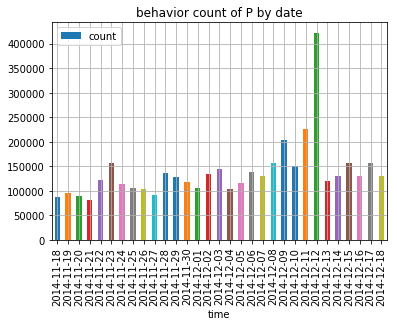

In [10]:
row_dict2csv(count_day, "count_day_of_P.csv" )
df_count_day = pd.read_csv("count_day_of_P.csv", header = None, names = ['time', 'count'])
df_count_day = df_count_day.sort_values('time').set_index('time')

df_count_day['count'].plot(kind='bar')
plt.legend(loc='best')
plt.title('behavior count of P by date')
plt.grid(True)
plt.show()

In [11]:
count_hour_1217 = {}   
count_hour_1218 = {}   
for i in range(24):    
    time_str17 = '2014-12-17 %02.d' % i
    time_str18 = '2014-12-18 %02.d' % i
    count_hour_1217[time_str17] = [0,0,0,0]
    count_hour_1218[time_str18] = [0,0,0,0]
batch = 0   
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H')
for df in pd.read_csv("tianchi_fresh_comp_train_user.csv", 
                      parse_dates = ['time'], 
                      index_col = ['time'], 
                      date_parser = dateparse,
                      chunksize = 50000): 
    for i in range(24):
            time_str17 = '2014-12-17 %02.d' % i
            time_str18 = '2014-12-18 %02.d' % i
            tmp17 = df[time_str17]['behavior_type'].value_counts()
            tmp18 = df[time_str18]['behavior_type'].value_counts()
            for j in range(len(tmp17)):              
                count_hour_1217[time_str17][tmp17.index[j]-1] += tmp17[tmp17.index[j]]
            for j in range(len(tmp18)):    
                count_hour_1218[time_str18][tmp18.index[j]-1] += tmp18[tmp18.index[j]]                       
    batch += 1
    print('chunk %d done.' %batch ) 
    
df_1217 = pd.DataFrame.from_dict(count_hour_1217, orient='index')  
df_1218 = pd.DataFrame.from_dict(count_hour_1218, orient='index') 
df_1217.to_csv("count_hour17.csv")                        
df_1218.to_csv("count_hour18.csv")

chunk 1 done.
chunk 2 done.
chunk 3 done.
chunk 4 done.
chunk 5 done.
chunk 6 done.
chunk 7 done.
chunk 8 done.
chunk 9 done.
chunk 10 done.
chunk 11 done.
chunk 12 done.
chunk 13 done.
chunk 14 done.
chunk 15 done.
chunk 16 done.
chunk 17 done.
chunk 18 done.
chunk 19 done.
chunk 20 done.
chunk 21 done.
chunk 22 done.
chunk 23 done.
chunk 24 done.
chunk 25 done.
chunk 26 done.
chunk 27 done.
chunk 28 done.
chunk 29 done.
chunk 30 done.
chunk 31 done.
chunk 32 done.
chunk 33 done.
chunk 34 done.
chunk 35 done.
chunk 36 done.
chunk 37 done.
chunk 38 done.
chunk 39 done.
chunk 40 done.
chunk 41 done.
chunk 42 done.
chunk 43 done.
chunk 44 done.
chunk 45 done.
chunk 46 done.
chunk 47 done.
chunk 48 done.
chunk 49 done.
chunk 50 done.
chunk 51 done.
chunk 52 done.
chunk 53 done.
chunk 54 done.
chunk 55 done.
chunk 56 done.
chunk 57 done.
chunk 58 done.
chunk 59 done.
chunk 60 done.
chunk 61 done.
chunk 62 done.
chunk 63 done.
chunk 64 done.
chunk 65 done.
chunk 66 done.
chunk 67 done.
chun

<Figure size 432x288 with 0 Axes>

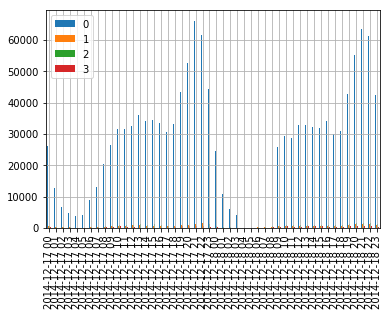

In [20]:
df_1217 = pd.read_csv("count_hour17.csv",index_col = 0)
df_1218 = pd.read_csv("count_hour18.csv",index_col = 0)

df_1718 = pd.concat([df_1217,df_1218])
df_1718.sort_index(inplace=True)

f1 = plt.figure(1)
df_1718.plot(kind='bar')
plt.legend(loc='best')
plt.grid(True)
plt.show()


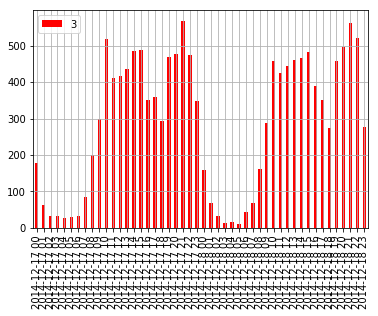

In [32]:
f2 = plt.figure(2)
df_1718["3"].plot(kind='bar', color = 'r')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [38]:
# user behavior analysis
user_list = [10001082, 
             10496835, 
             107369933,
             108266048,
             10827687, 
             108461135, 
             110507614, 
             110939584, 
             111345634, 
             111699844]
user_count = {}
for i in range(10):
    user_count[user_list[i]] = [0,0,0,0]  

In [39]:
batch = 0   # for process printing   
for df in pd.read_csv(open("tianchi_fresh_comp_train_user.csv", 'r'), 
                      chunksize = 100000,
                      index_col = ['user_id']): 
    for i in range(10):
        tmp = df[df.index == user_list[i]]['behavior_type'].value_counts()
        for j in range(len(tmp)):      
            user_count[user_list[i]][tmp.index[j]-1] += tmp[tmp.index[j]]
    batch += 1
    print('chunk %d done.' %batch )   

chunk 1 done.
chunk 2 done.
chunk 3 done.
chunk 4 done.
chunk 5 done.
chunk 6 done.
chunk 7 done.
chunk 8 done.
chunk 9 done.
chunk 10 done.
chunk 11 done.
chunk 12 done.
chunk 13 done.
chunk 14 done.
chunk 15 done.
chunk 16 done.
chunk 17 done.
chunk 18 done.
chunk 19 done.
chunk 20 done.
chunk 21 done.
chunk 22 done.
chunk 23 done.
chunk 24 done.
chunk 25 done.
chunk 26 done.
chunk 27 done.
chunk 28 done.
chunk 29 done.
chunk 30 done.
chunk 31 done.
chunk 32 done.
chunk 33 done.
chunk 34 done.
chunk 35 done.
chunk 36 done.
chunk 37 done.
chunk 38 done.
chunk 39 done.
chunk 40 done.
chunk 41 done.
chunk 42 done.
chunk 43 done.
chunk 44 done.
chunk 45 done.
chunk 46 done.
chunk 47 done.
chunk 48 done.
chunk 49 done.
chunk 50 done.
chunk 51 done.
chunk 52 done.
chunk 53 done.
chunk 54 done.
chunk 55 done.
chunk 56 done.
chunk 57 done.
chunk 58 done.
chunk 59 done.
chunk 60 done.
chunk 61 done.
chunk 62 done.
chunk 63 done.
chunk 64 done.
chunk 65 done.
chunk 66 done.
chunk 67 done.
chun

In [40]:
# storing the count result
df_user_count = pd.DataFrame.from_dict(user_count, orient='index')  
df_user_count.to_csv("user_count.csv")                  

In [41]:
###### simple prediction
batch = 0
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H')
for df in pd.read_csv(open("tianchi_fresh_comp_train_user.csv", 'r'), 
                      chunksize=100000): 
    df_act_34 = df[df['behavior_type'].isin([3,4])]     
    df_act_34.to_csv('act_34.csv',
                         columns=['time','user_id','item_id','behavior_type'],
                         index=False, header=False,
                         mode = 'a')
    batch += 1
    print('chunk %d done.' %batch) 

chunk 1 done.
chunk 2 done.
chunk 3 done.
chunk 4 done.
chunk 5 done.
chunk 6 done.
chunk 7 done.
chunk 8 done.
chunk 9 done.
chunk 10 done.
chunk 11 done.
chunk 12 done.
chunk 13 done.
chunk 14 done.
chunk 15 done.
chunk 16 done.
chunk 17 done.
chunk 18 done.
chunk 19 done.
chunk 20 done.
chunk 21 done.
chunk 22 done.
chunk 23 done.
chunk 24 done.
chunk 25 done.
chunk 26 done.
chunk 27 done.
chunk 28 done.
chunk 29 done.
chunk 30 done.
chunk 31 done.
chunk 32 done.
chunk 33 done.
chunk 34 done.
chunk 35 done.
chunk 36 done.
chunk 37 done.
chunk 38 done.
chunk 39 done.
chunk 40 done.
chunk 41 done.
chunk 42 done.
chunk 43 done.
chunk 44 done.
chunk 45 done.
chunk 46 done.
chunk 47 done.
chunk 48 done.
chunk 49 done.
chunk 50 done.
chunk 51 done.
chunk 52 done.
chunk 53 done.
chunk 54 done.
chunk 55 done.
chunk 56 done.
chunk 57 done.
chunk 58 done.
chunk 59 done.
chunk 60 done.
chunk 61 done.
chunk 62 done.
chunk 63 done.
chunk 64 done.
chunk 65 done.
chunk 66 done.
chunk 67 done.
chun

In [42]:
data_file = open('act_34.csv', 'r')
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H')
df_act_34 = pd.read_csv(data_file, 
                            parse_dates = [0],
                            date_parser = dateparse,
                            index_col = False)
df_act_34.columns = ['time','user_id','item_id','behavior_type']
df_act_34 = df_act_34.drop_duplicates(['user_id','item_id','behavior_type']) 

In [43]:
df_act_34.head()

,time,user_id,item_id,behavior_type
0,2014-12-14 03:00:00,10001082,220586551,4
1,2014-12-02 22:00:00,10001082,275221686,4
2,2014-12-02 16:00:00,10001082,141312432,4
3,2014-12-13 00:00:00,100029775,287413918,4
4,2014-12-12 15:00:00,100029775,222229697,3


In [44]:
df_time_3 = df_act_34[df_act_34['behavior_type'].isin(['3'])][['user_id','item_id','time']]
df_time_4 = df_act_34[df_act_34['behavior_type'].isin(['4'])][['user_id','item_id','time']]
df_time_3.columns = ['user_id','item_id', 'time3']
df_time_4.columns = ['user_id','item_id', 'time4']

In [45]:
df_time = pd.merge(df_time_3,df_time_4,on=['user_id','item_id'],how='outer')
df_time_34 = df_time.dropna()

In [46]:
df_time.head()

,user_id,item_id,time3,time4
0,100029775,222229697,2014-12-12 15:00:00,2014-12-12 15:00:00
1,100068031,250636264,2014-12-14 00:00:00,2014-12-14 00:00:00
2,100068031,296527651,2014-12-15 07:00:00,NaT
3,100068031,187577314,2014-12-15 06:00:00,NaT
4,100068031,150442941,2014-12-18 17:00:00,NaT


In [47]:
df_time_3 = df_time[df_time['time4'].isnull()].drop(['time4'], axis = 1)
df_time_3 = df_time_3.dropna()
df_time_3.to_csv('time_3.csv',
                  columns=['user_id','item_id','time3'],
                  index=False)

In [48]:
df_time_34.to_csv('time_34.csv',
                  columns=['user_id','item_id','time3', 'time4'],
                  index=False)

In [49]:
df_time_34 = pd.read_csv("time_34.csv", 
                        parse_dates = ['time3', 'time4'],
                            index_col = False)

In [50]:
delta_time = df_time_34['time4']-df_time_34['time3']
delta_hour = [] 
for i in range(len(delta_time)):
    d_hour = delta_time[i].days*24+delta_time[i]._h
    if d_hour < 0: 
        continue     # clean invalid result
    else: 
        delta_hour.append(d_hour)

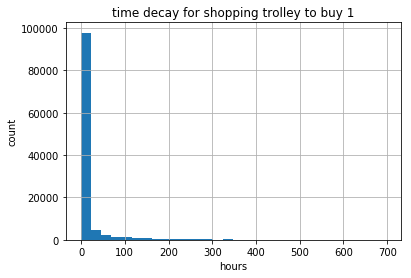

In [51]:
f1 = plt.figure(1)
plt.hist(delta_hour, 30)
plt.xlabel('hours')
plt.ylabel('count')
plt.title('time decay for shopping trolley to buy 1')
plt.grid(True)
plt.show()

In [52]:
df_time_3 = pd.read_csv("time_3.csv", parse_dates = ['time3'], index_col = ['time3'])
ui_pred = df_time_3['2014-12-18'] 

In [53]:
ui_pred_in_P = pd.merge(ui_pred,P,on = ['item_id']) 

In [54]:
ui_pred_in_P.head()

,user_id,item_id,item_geohash,item_category
0,100442521,85464552,NaN,7876
1,100442521,169674678,NaN,12067
2,103215328,126238643,NaN,11991
3,103490614,300814663,NaN,9614
4,103490614,79590796,NaN,5533


In [55]:
ui_pred_in_P.to_csv('tianchi_mobile_recommendation_predict.csv',
                    columns=['user_id','item_id'],
                    index=False)